In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import glob
import numpy as np
mpl.rcParams["xtick.major.size"] = 3
mpl.rcParams["ytick.major.size"] = 3

# Deterministic Experiments

In [25]:
environments = [
    "Random d=2",
    "Random d=3",
    "Random d=4",
    "Random d=5",
    "Random d=6"
]

## 3-Armed Bandits

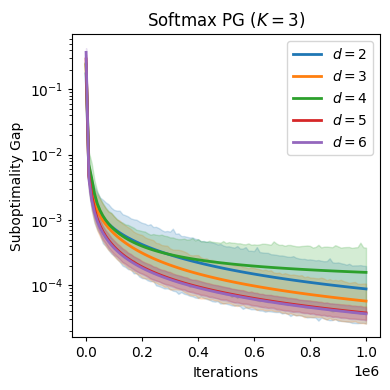

In [27]:
log_dir = "logs"
experiment_name = f"linear_pg_3_arm"
path = f"{log_dir}/{experiment_name}"

fig, axes = plt.subplots(
    nrows=1, ncols=1, figsize=(4, 4), sharex=False, sharey=False, squeeze=False
)
ax = axes.flat[0]

df = pd.concat(
    (pd.read_csv(f, index_col=0) for env in environments for f in glob.glob(f"{path}/{env}/*.csv")),
    ignore_index=True,
)

line_plot = sns.lineplot(
    data=df, x="iteration", y="sub_opt_gap", hue="env_name", ax=ax, linewidth=2.0
)

ax.set_xlabel("Iterations")
ax.set_ylabel("Suboptimality Gap")
ax.set_yscale("log")
ax.set_title("Softmax PG ($K=3$)")

handles, labels = ax.get_legend_handles_labels()
new_labels = ["$" + label.replace("Random ", "") + "$" for label in labels]
ax.legend(handles, new_labels)

plt.tight_layout()
plt.savefig("plots/det_3_arm.png", bbox_inches="tight", dpi=400)

## Multi-Armed Bandits

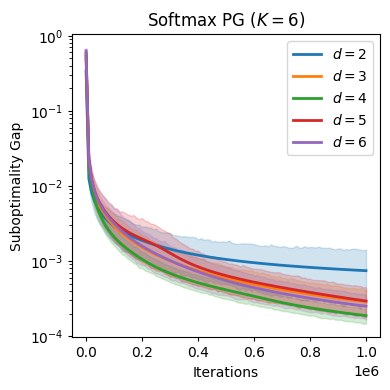

In [28]:
log_dir = "logs"
experiment_name = f"linear_pg_multi_arm"
path = f"{log_dir}/{experiment_name}"

fig, axes = plt.subplots(
    nrows=1, ncols=1, figsize=(4, 4), sharex=False, sharey=False, squeeze=False
)
ax = axes.flat[0]

df = pd.concat(
    (pd.read_csv(f, index_col=0) for env in environments for f in glob.glob(f"{path}/{env}/*.csv")),
    ignore_index=True,
)

line_plot = sns.lineplot(
    data=df, x="iteration", y="sub_opt_gap", hue="env_name", ax=ax, linewidth=2.0
)

ax.set_xlabel("Iterations")
ax.set_ylabel("Suboptimality Gap")
ax.set_yscale("log")
ax.set_title("Softmax PG ($K=6$)")

handles, labels = ax.get_legend_handles_labels()
new_labels = ["$" + label.replace("Random ", "") + "$" for label in labels]
ax.legend(handles, new_labels)

plt.tight_layout()
plt.savefig("plots/det_multi_arm.png", bbox_inches="tight", dpi=400)

# Stochastic Experiments

## Non-linear Setting

In [29]:
log_dir = "logs"
experiment_name = f"spg"
path = f"{log_dir}/{experiment_name}"

### Different Stepsizes

In [30]:
environments = [
    "Bernoulli (easy)",
    "Gaussian (easy)",
    "Beta (easy)",
    "Bernoulli (hard)",
    "Gaussian (hard)",
    "Beta (hard)",
]

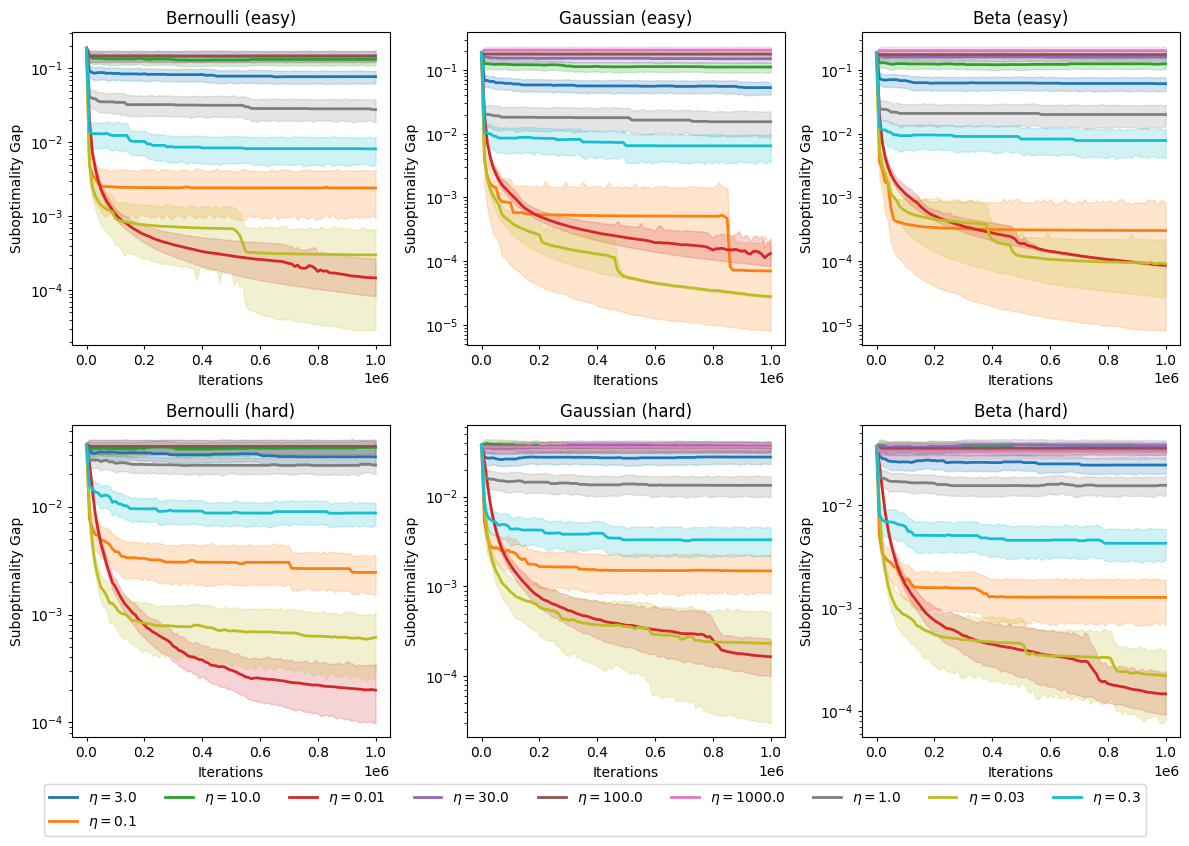

In [31]:
fig, axes = plt.subplots(
    nrows=2, ncols=3, figsize=(12, 8), sharex=False, sharey=False, squeeze=False
)
for idx, (env, ax) in enumerate(zip(environments, axes.flat)):
    pathenv = f"{path}/{env}"

    log_files = glob.glob(f"{pathenv}/*.csv")
    assert len(log_files), f"No files in '{pathenv}/*.csv' found"
    for f in log_files:
        df = pd.concat(
            (pd.read_csv(f, index_col=0) for f in glob.glob(f"{pathenv}/*.csv")),
            ignore_index=True,
        )

    line_plot = sns.lineplot(
        data=df, x="iteration", y="sub_opt_gap", hue="algo", ax=ax, linewidth=2.0
    )

    # remove legend in subplots
    line_plot.get_legend().remove()
    ax.set_xlabel("Iterations")
    ax.set_ylabel("Suboptimality Gap")
    ax.set_yscale("log")
    ax.set_title(env)

# obtain the labels of the first subplot
# assume that all plots have the same labels
lines, labels = fig.axes[0].get_legend_handles_labels()
new_labels = [f"$\{label.replace('spg_', '')}$" for label in labels]
fig.legend(lines, new_labels, loc="lower center", ncol=9, bbox_to_anchor=[0.5, -0.06])
plt.tight_layout()
# plt.savefig("plots/sto_stepsizes.png", bbox_inches="tight", dpi=400)

### Different Runs

In [36]:
environments = [
    "Bernoulli (easy)",
    "Gaussian (easy)",
    "Beta (easy)",
    # "Bernoulli (hard)",
    # "Gaussian (hard)",
    # "Beta (hard)",
    # "Fixed (easy)",
    # "Fixed (hard)"
]
etas = [
    "0.01",
    "0.1",
    "1.0",
    "10.0"
]

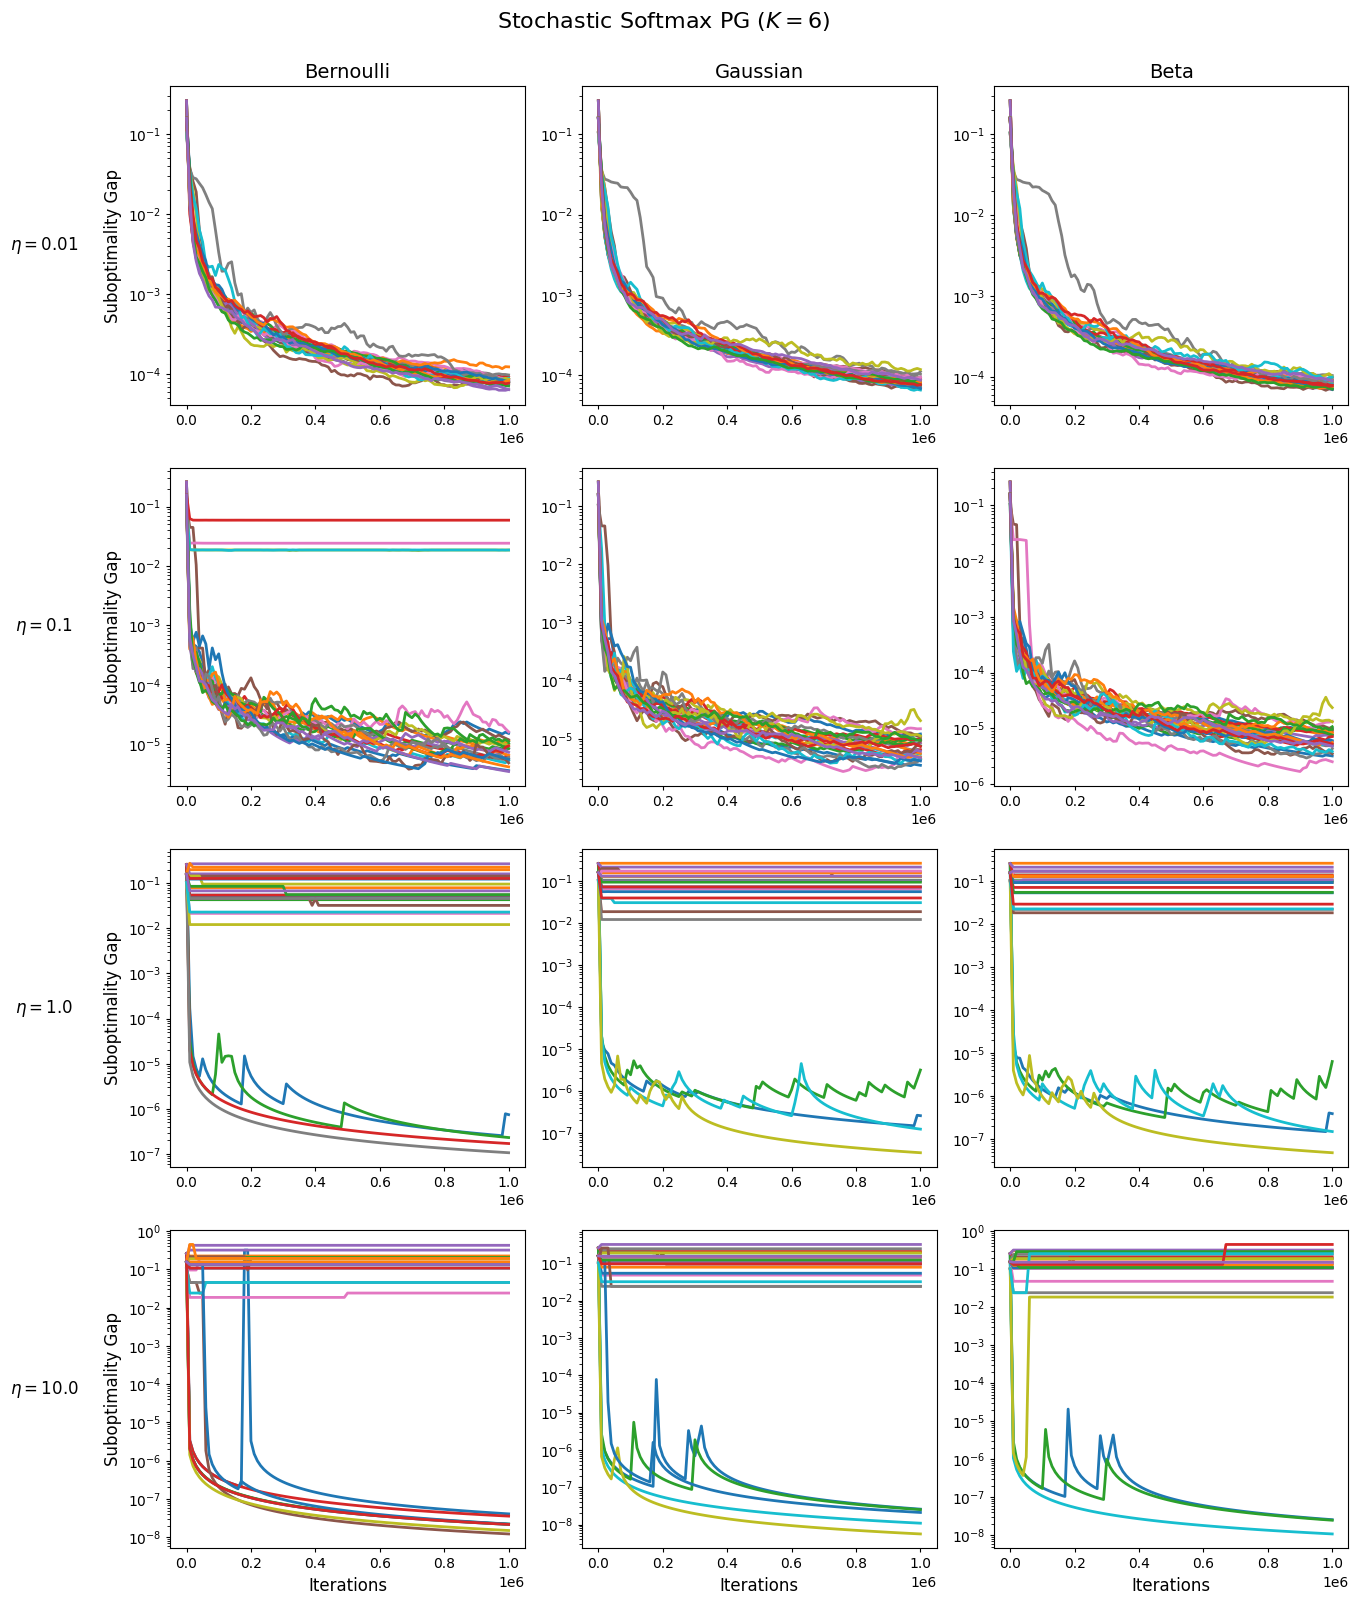

In [37]:
fig, axes = plt.subplots(
    nrows=len(etas), ncols=len(environments), figsize=(len(environments) * 4 + 2, len(etas) * 4), 
    sharex=False, sharey=False, squeeze=False
)

for eta_idx, eta in enumerate(etas):
    for env_idx, env in enumerate(environments):
        ax = axes[eta_idx, env_idx]
        pathenv = f"{path}/{env}"

        log_files = glob.glob(f"{pathenv}/*.csv")
        assert len(log_files), f"No files in '{pathenv}/*.csv' found"
        
        # Concatenate all CSV files found in pathenv
        df = pd.concat(
            (pd.read_csv(f, index_col=0) for f in log_files),
            ignore_index=True,
        )

        # Filter data for the current stepsize (eta) and for instance_number < 5
        df = df[df["algo"].str.contains(f"eta={eta}")]
        df = df[df["instance_number"] < 5]

        # Convert run_number to category for proper legend handling
        df["run_number"] = df["run_number"].astype("category")

        sns.lineplot(
            data=df, 
            x="iteration", 
            y="sub_opt_gap", 
            hue="run_number", 
            ax=ax, 
            linewidth=2.0, 
            palette="tab10", 
            errorbar=None
        ).get_legend().remove()

        # ax.set_xscale("log")
        ax.set_yscale("log")

# --- Set a title for the entire figure ---
fig.suptitle("Stochastic Softmax PG ($K=6$)", fontsize=16, y=1)

# ------------------------------
# Add column titles for environments (top row only)
# ------------------------------
for env_idx, env in enumerate(environments):
    # Remove extra info from environment name if needed.
    axes[0, env_idx].set_title(env.replace(" (easy)", ""), fontsize=14)

# ------------------------------
# Remove the x- and y-labels from all subplots so they aren’t repeated.
# ------------------------------
for ax in axes.flatten():
    ax.set_xlabel("")
    ax.set_ylabel("")

# ------------------------------
# Add the common x-axis label ("Iterations") only on the bottom row.
# ------------------------------
for env_idx in range(len(environments)):
    axes[-1, env_idx].set_xlabel("Iterations", fontsize=12)

# ------------------------------
# Add the common y-axis label ("Suboptimality Gap") only on the left column.
# ------------------------------
for eta_idx in range(len(etas)):
    axes[eta_idx, 0].set_ylabel("Suboptimality Gap", fontsize=12)

plt.tight_layout()

# ------------------------------
# Add horizontal stepsize labels for each row along the left edge.
# These labels indicate which stepsize is plotted in that row.
# ------------------------------
for eta_idx, eta in enumerate(etas):
    pos = axes[eta_idx, 0].get_position()  # position in figure coordinates
    # Compute the vertical center of the leftmost subplot.
    y = pos.y0 + pos.height / 2
    x = pos.x0
    fig.text(x, y, f"$\\eta = {eta}$", ha="center", va="center", rotation=0, fontsize=12)

plt.tight_layout(rect=[0.09, 0, 1, 1])
# plt.savefig("plots/sto_instances.png", bbox_inches="tight", dpi=400)
plt.show()

## Linear Setting

In [38]:
log_dir = "logs"
experiment_name = f"linear_spg"
path = f"{log_dir}/{experiment_name}"

### Different Stepsizes

In [39]:
environments = [
    "Bernoulli (easy)",
    "Gaussian (easy)",
    "Beta (easy)",
    "Bernoulli (hard)",
    "Gaussian (hard)",
    "Beta (hard)",
]

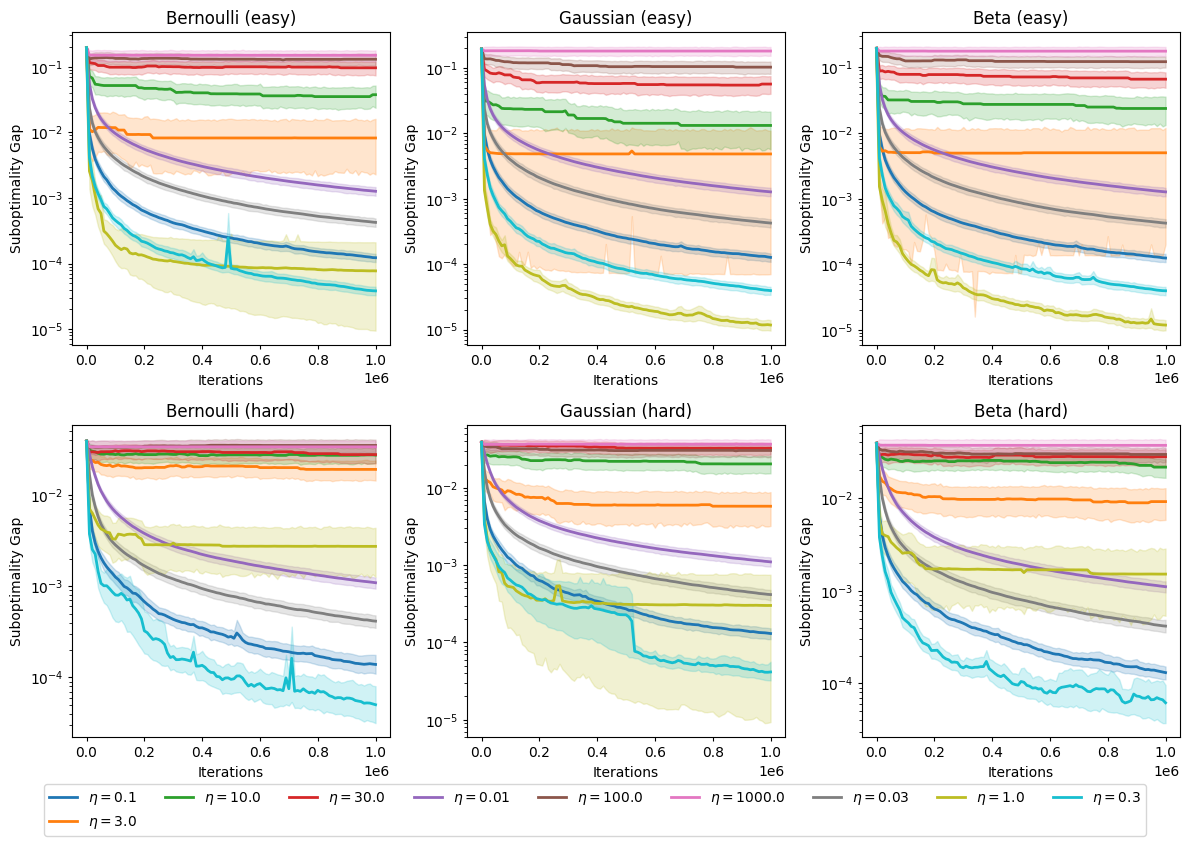

In [40]:
fig, axes = plt.subplots(
    nrows=2, ncols=3, figsize=(12, 8), sharex=False, sharey=False, squeeze=False
)
for idx, (env, ax) in enumerate(zip(environments, axes.flat)):
    pathenv = f"{path}/{env}"

    log_files = glob.glob(f"{pathenv}/*.csv")
    assert len(log_files), f"No files in '{pathenv}/*.csv' found"
    for f in log_files:
        df = pd.concat(
            (pd.read_csv(f, index_col=0) for f in glob.glob(f"{pathenv}/*.csv")),
            ignore_index=True,
        )

    # df = df[df["algo"].str.contains("eta=1") == True]

    line_plot = sns.lineplot(
        data=df, x="iteration", y="sub_opt_gap", hue="algo", ax=ax, linewidth=2.0
    )

    # remove legend in subplots
    line_plot.get_legend().remove()
    ax.set_xlabel("Iterations")
    ax.set_ylabel("Suboptimality Gap")
    ax.set_yscale("log")
    ax.set_title(env)

# obtain the labels of the first subplot
# assume that all plots have the same labels
lines, labels = fig.axes[0].get_legend_handles_labels()
new_labels = [f"$\{label.replace('linear_spg_', '')}$" for label in labels]
fig.legend(lines, new_labels, loc="lower center", ncol=9, bbox_to_anchor=[0.5, -0.06])
plt.tight_layout()
plt.savefig("plots/sto_stepsizes.png", bbox_inches="tight", dpi=400)

### Different Runs

In [54]:
environments = [
    "Bernoulli (easy)",
    "Gaussian (easy)",
    "Beta (easy)",
    # "Bernoulli (hard)",
    # "Gaussian (hard)",
    # "Beta (hard)",
]
etas = [
    # "0.01",
    "0.1",
    "1.0",
    "10.0",
    "100.0",
    # "1000.0"
]

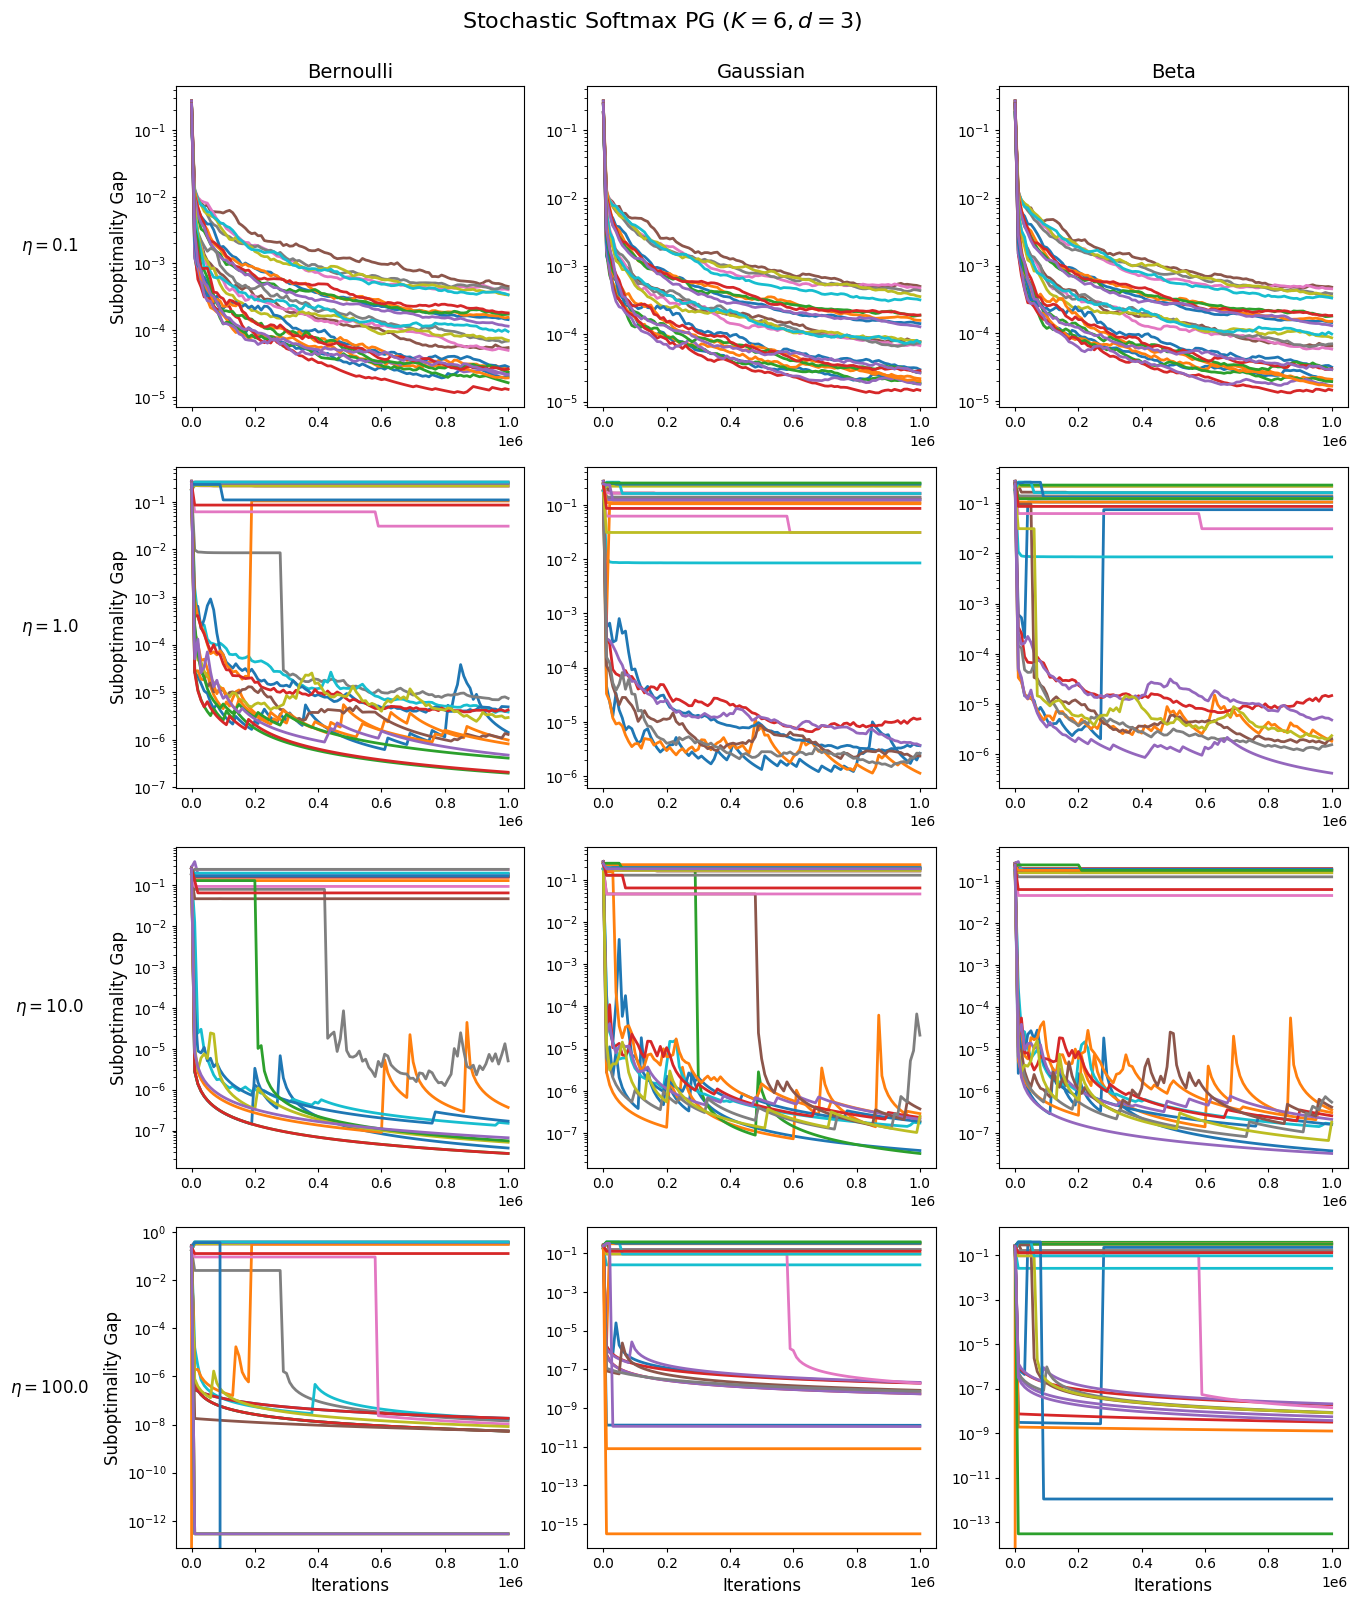

In [57]:
fig, axes = plt.subplots(
    nrows=len(etas), ncols=len(environments), figsize=(len(environments) * 4 + 2, len(etas) * 4), 
    sharex=False, sharey=False, squeeze=False
)

for eta_idx, eta in enumerate(etas):
    for env_idx, env in enumerate(environments):
        ax = axes[eta_idx, env_idx]
        pathenv = f"{path}/{env}"

        log_files = glob.glob(f"{pathenv}/*.csv")
        assert len(log_files), f"No files in '{pathenv}/*.csv' found"
        
        # Concatenate all CSV files found in pathenv
        df = pd.concat(
            (pd.read_csv(f, index_col=0) for f in log_files),
            ignore_index=True,
        )

        # Filter data for the current stepsize (eta) and for instance_number < 5
        df = df[df["algo"].str.contains(f"eta={eta}")]
        df = df[df["instance_number"] < 5]

        # Convert run_number to category for proper legend handling
        df["run_number"] = df["run_number"].astype("category")

        sns.lineplot(
            data=df, 
            x="iteration", 
            y="sub_opt_gap",
            hue="run_number", 
            ax=ax, 
            linewidth=2.0, 
            palette="tab10", 
            errorbar=None
        ).get_legend().remove()

        # ax.set_xscale("log")
        ax.set_yscale("log")

# --- Set a title for the entire figure ---
fig.suptitle("Stochastic Softmax PG ($K=6, d=3$)", fontsize=16, y=1)

# ------------------------------
# Add column titles for environments (top row only)
# ------------------------------
for env_idx, env in enumerate(environments):
    # Remove extra info from environment name if needed.
    axes[0, env_idx].set_title(env.replace(" (easy)", ""), fontsize=14)

# ------------------------------
# Remove the x- and y-labels from all subplots so they aren’t repeated.
# ------------------------------
for ax in axes.flatten():
    ax.set_xlabel("")
    ax.set_ylabel("")

# ------------------------------
# Add the common x-axis label ("Iterations") only on the bottom row.
# ------------------------------
for env_idx in range(len(environments)):
    axes[-1, env_idx].set_xlabel("Iterations", fontsize=12)

# ------------------------------
# Add the common y-axis label ("Suboptimality Gap") only on the left column.
# ------------------------------
for eta_idx in range(len(etas)):
    axes[eta_idx, 0].set_ylabel("Suboptimality Gap", fontsize=12)

plt.tight_layout()

# ------------------------------
# Add horizontal stepsize labels for each row along the left edge.
# These labels indicate which stepsize is plotted in that row.
# ------------------------------
for eta_idx, eta in enumerate(etas):
    pos = axes[eta_idx, 0].get_position()  # position in figure coordinates
    # Compute the vertical center of the leftmost subplot.
    y = pos.y0 + pos.height / 2
    x = pos.x0
    fig.text(x, y, f"$\\eta = {eta}$", ha="center", va="center", rotation=0, fontsize=12)

plt.tight_layout(rect=[0.09, 0, 1, 1])
plt.savefig("plots/sto_instances.png", bbox_inches="tight", dpi=400)
plt.show()